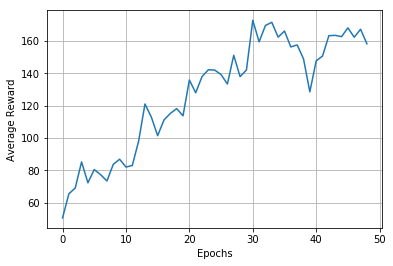

In [1]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

file_name = 'Results_DQN_test1'

with open(file_name, 'rb') as file:
    avgReward = pickle.load(file)
    
plt.plot(avgReward)
plt.xlabel('Epochs')
plt.ylabel('Average Reward')
plt.grid(axis='both')
plt.show()

In [2]:
import numpy as np 
import tensorflow as tf 
import gym

env = gym.make('CartPole-v0')

state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n


def DQN(w1,w2,w3,b1,b2,b3):

        inputs = tf.placeholder(tf.float32,[None,state_dim], name='inputs')
        
        # Create the 1st layer of Neural Network
        h1 = tf.nn.tanh(tf.matmul(inputs,w1) + b1) 

        # Create the 2nd Layer of Neural Nework (Action Inserted in the second layer)
        h2 = tf.nn.tanh(tf.matmul(h1,w2) + b2)

        # Create the output layer of the Neural Network
        out = tf.add(tf.matmul(h2,w3), b3, name='Net_output')

        return inputs, out

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('DQN_Results/DQN_net.meta')
    saver.restore(sess,tf.train.latest_checkpoint('DQN_Results'))
    w1 = sess.run('w1:0')
    w2 = sess.run('w2:0')
    w3 = sess.run('w3:0')
    b1 = sess.run('b1:0')
    b2 = sess.run('b2:0')
    b3 = sess.run('b3:0')

    inputs, out = DQN(w1,w2,w3,b1,b2,b3)
    s = env.reset()
    for i in range(999):
        env.render()
        
        Qval = sess.run(out, feed_dict={inputs:np.reshape(s,(1,state_dim))})
        action = np.argmax(Qval)
        s1,r,done,_ = env.step(action)
        s = s1
        if done:
            break

[2018-09-19 21:40:55,158] Making new env: CartPole-v0
